In [61]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
# We start with a function that finds the smallest value in our array

def findSmallest(arr):
    smallest = arr[0] # stores the smallest value
    smallestIndex = 0 # stores the index of the smallest value
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallestIndex = i
    return smallestIndex

In [38]:
# Our findSmallest function can be used in the selection sort algorithm

def selectionSort(arr):
    newArr = []
    arrList = arr.tolist()
    for i in range(len(arrList)):
        smallest = findSmallest(arrList) #Finds the smallest in the array
        newArr.append(arrList.pop(smallest))
    return newArr

In [39]:
#Compare alternative sorting algorithms.
# Here, we'll use a sorting algorithm that works on numpy arrays without needing pop or
# to convert to a list

def selectionSort2(arr):
    arr = np.array(arr)
    for i in range(len(arr)):
        j = arr[i:].argmin()
        arr[i], arr[i + j] = arr[i + j], arr[i]
    return arr



In [40]:
#Instead of creating arrays one-by-one, we'll use a loop to create a dict of arrays
#The size of the array is our key and the array is our value

arraySizes = (5000, 10000, 15000, 20000, 25000)

myArray = dict()

for size in arraySizes:
    seed(7769)
    myArray[size] = randint(99999, size = size)



In [41]:
#Let's make our runtime variables for the grokking algorithms book example array

start = time.clock()
sort5k = selectionSort(myArray[5000])
stop  = time.clock()
time5k = stop - start

start = time.clock()
sort10k = selectionSort(myArray[10000])
stop  = time.clock()
time10k = stop - start

start = time.clock()
sort15k = selectionSort(myArray[15000])
stop = time.clock()
time15k = stop - start

start = time.clock()
sort20k = selectionSort(myArray[20000])
stop = time.clock()
time20k = stop - start

start = time.clock()
sort25k = selectionSort(myArray[25000])
stop = time.clock()
time25k = stop - start


In [42]:
#Let's go through this same process with our second sort algorithm
start = time.clock()
sort5k2 = selectionSort2(myArray[5000])
stop  = time.clock()
time5k2 = stop - start

start = time.clock()
sort10k2 = selectionSort2(myArray[10000])
stop  = time.clock()
time10k2 = stop - start

start = time.clock()
sort15k2 = selectionSort2(myArray[15000])
stop = time.clock()
time15k2 = stop - start

start = time.clock()
sort20k2 = selectionSort2(myArray[20000])
stop = time.clock()
time20k2 = stop - start

start = time.clock()
sort25k2 = selectionSort2(myArray[25000])
stop = time.clock()
time25k2 = stop - start


In [48]:
#We'll try this same sort with numpy's built-in sort

start = time.clock()
sort5k3 = np.sort(myArray[5000])
stop  = time.clock()
time5k3 = stop - start

start = time.clock()
sort10k3 = np.sort(myArray[10000])
stop  = time.clock()
time10k3 = stop - start

start = time.clock()
sort15k3 = np.sort(myArray[15000])
stop = time.clock()
time15k3 = stop - start

start = time.clock()
sort20k3 = np.sort(myArray[20000])
stop = time.clock()
time20k3 = stop - start

start = time.clock()
sort25k3 = np.sort(myArray[25000])
stop = time.clock()
time25k3 = stop - start


In [67]:
timeTable = pd.DataFrame(np.array([['ArraySize', 'grokkingSortTime', 'Numpy-based Sort Time', 'Built-In Numpy Sort'],
                     [5000, time5k, time5k2, time5k3],
                     [10000, time10k, time10k2, time10k3],
                     [15000, time15k, time15k2, time15k3],
                     [20000, time20k, time20k2, time20k3],
                     [25000, time25k, time25k2, time25k3]]))

timeTable

,0,1,2,3
0,ArraySize,grokkingSortTime,Numpy-based Sort Time,Built-In Numpy Sort
1,5000,0.6192980000000006,0.035468000000008715,0.0013030000000071595
2,10000,2.5716350000000006,0.08588999999997782,0.0030899999999860484
3,15000,5.6743979999999965,0.17769300000000499,0.0018660000000068067
4,20000,10.866554000000008,0.2891300000000001,0.0022659999999916636
5,25000,22.95670300000002,0.43608299999999645,0.0024499999999818556


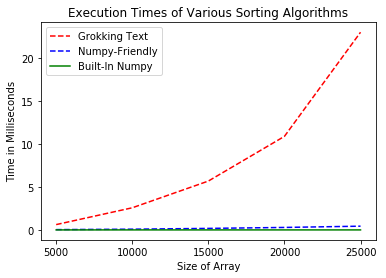

In [59]:
plt.plot([5000, 10000, 15000, 20000, 25000],
        [time5k, time10k, time15k, time20k, time25k],
        'r--',
        [5000, 10000, 15000, 20000, 25000],
        [time5k2, time10k2, time15k2, time20k2, time25k2],
        'b--',
        [5000, 10000, 15000, 20000, 25000],
        [time5k3, time10k3, time15k3, time20k3, time25k3],
        'g-')
plt.xlabel('Size of Array')
plt.ylabel('Time in Milliseconds')
plt.title('Execution Times of Various Sorting Algorithms')
plt.legend(['Grokking Text', 'Numpy-Friendly', 'Built-In Numpy'])
plt.xticks(np.arange(5000, 30000, 5000))
plt.show()
